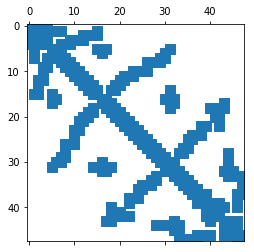

In [10]:
import scipy.sparse
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors
import pylab as pl
import scipy as sp
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import healpy as hp


nside = 2


L = scipy.sparse.load_npz('09_FEM_linear_Laplacian/stiffnessmatrix_{}.npz'.format(nside))
plt.spy(L)
signal = np.zeros(12*nside**2)
signal[0] = 1


In [11]:
def subplotsphere(fig, signal, coords, tri, j):
    ax = fig.add_subplot(2,2,j+1, projection='3d')
    M = np.max(signal)
    for simplex in tri.simplices:
        triangle = a3.art3d.Poly3DCollection([coords[simplex]])
        triangle.set_color(colors.rgb2hex([np.max(signal[simplex]/M), 0,0]))
        triangle.set_edgecolor('k')
        ax.add_collection3d(triangle)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)

# FEM diffusion

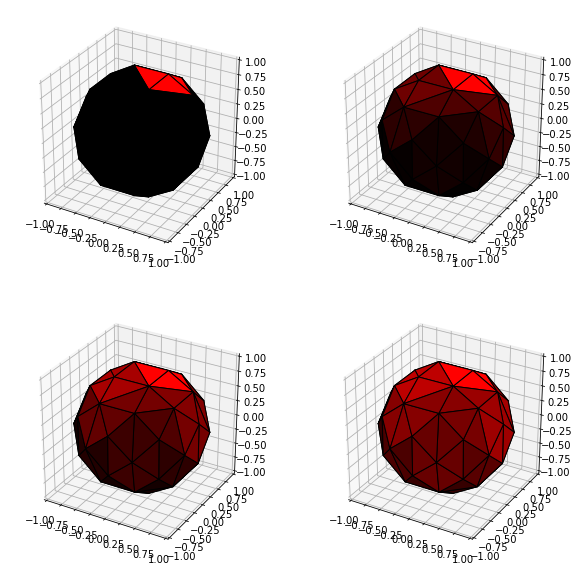

In [12]:
fig = plt.figure(figsize=(10,10))


indexes = range(nside**2 * 12)
x, y, z = hp.pix2vec(nside, indexes)
coords = np.vstack([x, y, z]).transpose()
coords = np.asarray(coords)
tri = ConvexHull(coords)  # just for plotting

for j in range(4):
    subplotsphere(fig, signal, coords, tri, j)
    
    # diffusing 3 times
    for i in range(3):
        signal = scipy.sparse.linalg.spsolve(L, signal)

# GRAPH diffusion

2019-05-06 18:11:35,056:[WARNING](pygsp.graphs.graph.lmax): The largest eigenvalue G.lmax is not available, we need to estimate it. Explicitly call G.estimate_lmax() or G.compute_fourier_basis() once beforehand to suppress the warning.


/Users/Mart/anaconda3/envs/deepsphere/lib/python3.6/site-packages/pygsp/filters/__init__.py


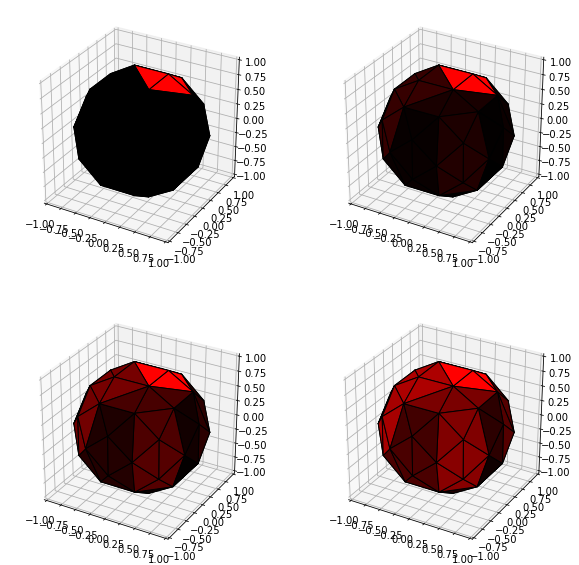

In [27]:
from pygsp import filters
print(filters.__file__)
signal = np.zeros(12*nside**2)
signal[0] = 1
fig = plt.figure(figsize=(10,10))
from deepsphere import utils
graph = utils.full_healpix_graph(nside, dtype=np.float64, std=0.3)
heat_kernel = filters.Heat(graph, scale=0.5)

for j in range(4):
    subplotsphere(fig, signal, coords, tri, j)
    
    # diffusing 3 times
    for i in range(3):
        signal = heat_kernel.filter(signal)